# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib

^C
  Using cached tensorflow-2.16.1-cp310-cp310-win_amd64.whl (2.1 kB)
  Using cached opencv_python-4.10.0.82-cp37-abi3-win_amd64.whl (38.8 MB)
  Using cached matplotlib-3.9.0-cp310-cp310-win_amd64.whl (8.0 MB)
  Using cached tensorflow_intel-2.16.1-cp310-cp310-win_amd64.whl (376.9 MB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached packaging-24.1-py3-none-any.whl (53 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached h5py-3.11.0-cp310-cp310-win_amd64.whl (3.0 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Using cached protobuf-4.25.3-cp310-abi3-w

In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
astunparse                   1.6.3
certifi                      2024.6.2
charset-normalizer           3.3.2
contourpy                    1.2.1
cycler                       0.12.1
flatbuffers                  24.3.25
fonttools                    4.53.0
gast                         0.5.4
google-pasta                 0.2.0
grpcio                       1.64.1
h5py                         3.11.0
idna                         3.7
keras                        3.3.3
kiwisolver                   1.4.5
libclang                     18.1.1
Markdown                     3.6
markdown-it-py               3.0.0
MarkupSafe                   2.1.5
matplotlib                   3.9.0
mdurl                        0.1.2
ml-dtypes                    0.3.2
namex                        0.0.8
numpy                        1.26.4
opencv-python                4.10.0.82
opt-einsum                   3.3.0
o

You should consider upgrading via the 'C:\Users\Kenneth\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
import tensorflow as tf
import os

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

NotADirectoryError: [WinError 267] The directory name is invalid: 'data\\8cxKy5g9i.jpg'

# 3. Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

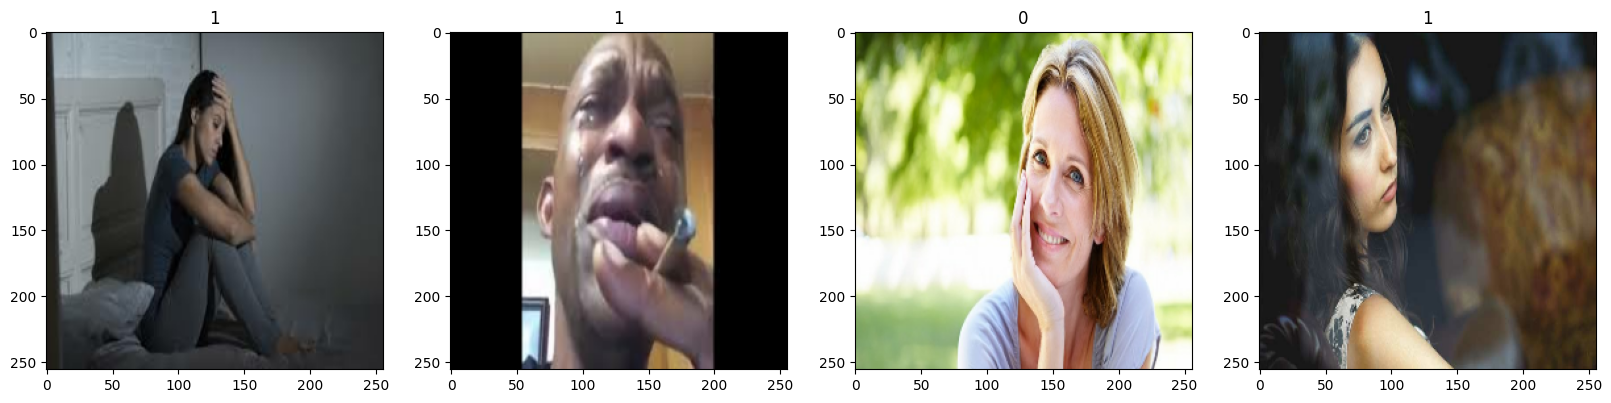

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.8       , 0.8       , 0.8       ],
          [0.8       , 0.8       , 0.8       ],
          [0.8       , 0.8       , 0.8       ],
          ...,
          [0.8       , 0.8       , 0.8       ],
          [0.8       , 0.8       , 0.8       ],
          [0.8       , 0.8       , 0.8       ]],
 
         [[0.8       , 0.8       , 0.8       ],
          [0.8       , 0.8       , 0.8       ],
          [0.8       , 0.8       , 0.8       ],
          ...,
          [0.8       , 0.8       , 0.8       ],
          [0.8       , 0.8       , 0.8       ],
          [0.8       , 0.8       , 0.8       ]],
 
         [[0.8       , 0.8       , 0.8       ],
          [0.8       , 0.8       , 0.8       ],
          [0.8       , 0.8       , 0.8       ],
          ...,
          [0.8       , 0.8       , 0.8       ],
          [0.8       , 0.8       , 0.8       ],
          [0.8       , 0.8       , 0.8       ]],
 
         ...,
 
         [[0.0627451 , 0.07450981, 0.13333334],
          [0.06274

# 5. Split Data

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size+val_size+test_size

10

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [20]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

D:\Thesis Files\ImageClassification\imageclassification\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 553ms/step - accuracy: 0.4955 - loss: 1.0464 - val_accuracy: 0.5625 - val_loss: 0.6192
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 548ms/step - accuracy: 0.5230 - loss: 0.6363 - val_accuracy: 0.6250 - val_loss: 0.6466
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 510ms/step - accuracy: 0.7095 - loss: 0.6377 - val_accuracy: 0.6562 - val_loss: 0.5504
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 528ms/step - accuracy: 0.7068 - loss: 0.5482 - val_accuracy: 0.8125 - val_loss: 0.5094
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 513ms/step - accuracy: 0.8440 - loss: 0.4352 - val_accuracy: 0.8281 - val_loss: 0.4224
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 496ms/step - accuracy: 0.8615 - loss: 0.4070 - val_accuracy: 0.8750 - val_loss: 0.3491
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 495ms/step - accuracy: 0.8674 - loss: 0.3098 - val_accuracy: 0.9062 - val_loss: 0.1802
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 518ms/step - accuracy: 0.8798 - loss: 0.2563 - val_accuracy: 0.9219 - val_loss:

# 8. Plot Performance

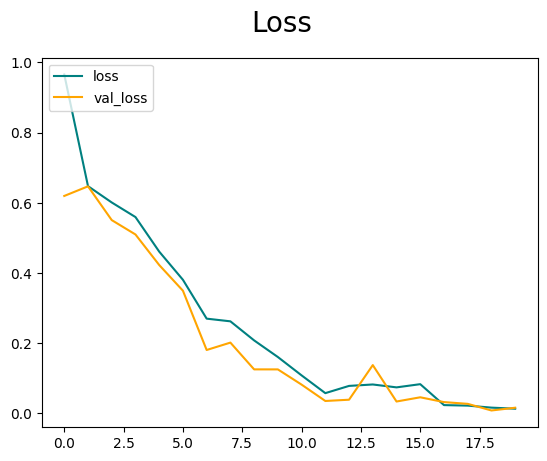

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

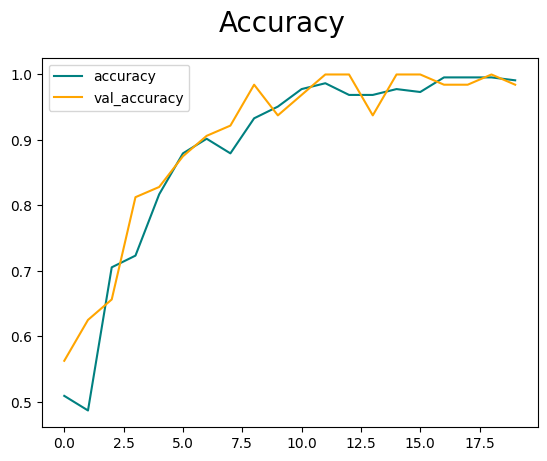

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [36]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


In [37]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [38]:
import cv2

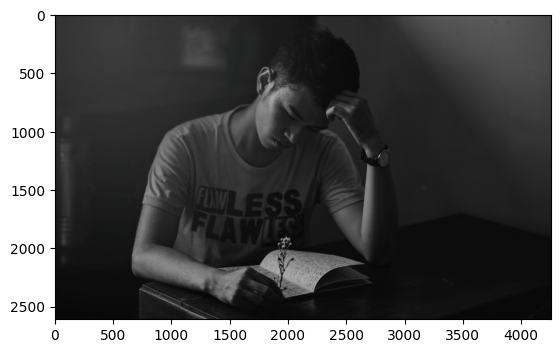

In [101]:
img = cv2.imread('sa3.jpg')
plt.imshow(img)
plt.show()

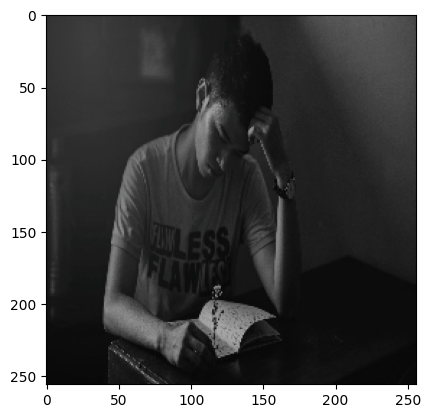

In [102]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [103]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [104]:
yhat

array([[0.99976677]], dtype=float32)

In [105]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','imageclassifier.h5'))

In [46]:
new_model = load_model('imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)